**BBM473 Database Laboratory (Spring 2022)**


Exercise 7: Relational Algebra & Logical Equivalence
=============================

First, execute the following codes below.

**Note:** You may need to install `markdown`:

    $ pip install markdown

In [ ]:
%load_ext sql
%sql sqlite://

%load_ext autoreload
%autoreload 2

# To help render markdown
from IPython.core.display import display, Markdown
from markdown import markdown
def render_markdown_raw(m): return display(Markdown(markdown(m))) # must be last element of cell.
def render_markdown(m): return render_markdown_raw(m.toMD())

# import the relational algbera operators
from relation_algebra import Select, Project, NJoin, BaseRelation
from relation_algebra import get_result

from display_tools import side_by_side

In [ ]:
%%sql
drop table if exists R; create table R(A int, B int);
drop table if exists S; create table S(B int, C int);
drop table if exists T; create table T(C int, D int);
drop table if exists U; create table U(D int, E int);

 * sqlite://
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [ ]:
for x in range(0,10,2):
    for y in range(0,10,3):
        %sql INSERT INTO R VALUES (:x, :y);
for x in range(0,20,4):
    for y in range(0,10,2):
        %sql INSERT INTO S VALUES (:x, :y);
for x in range(0,5,1):
    for y in range(0,10,2):
        %sql INSERT INTO T VALUES (:x, :y);
for x in range(0,10,2):
    for y in range(0,5,1):
        %sql INSERT INTO U VALUES (:x, :y);

 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite://
1 rows affected.
 * sqlite:

### Tutorial: Relational Algebra Python Toolkit

We'll use a python toolkit we made to play around with RA.  We'll get started with a quick tutorial, but the syntax should also be pretty intuitive (feel free to look at the source code too!)

#### BaseRelation class

Recall that in our RA operations we'll deal with sets; to get started, we need to take SQL output and turn it into a `BaseRelation` object, which we can optionally name:

In [ ]:
r = %sql SELECT * FROM R;
R = BaseRelation(r, name="R")

s = %sql SELECT * FROM S;
S = BaseRelation(s, name="S")

t = %sql SELECT * FROM T;
T = BaseRelation(t, name="T")

u = %sql SELECT * FROM U;
U = BaseRelation(u, name="U")

 * sqlite://
Done.
 * sqlite://
Done.
 * sqlite://
Done.
 * sqlite://
Done.


For **all operators in our toolkit**, we can use `get_result` to see the set we have:

In [ ]:
print (get_result(R))

[(0, 0), (0, 3), (0, 6), (0, 9), (2, 0), (2, 3), (2, 6), (2, 9), (4, 0), (4, 3), (4, 6), (4, 9), (6, 0), (6, 3), (6, 6), (6, 9), (8, 0), (8, 3), (8, 6), (8, 9)]


And (again **for all operators in our toolkit**) we can use `render_markdown(R)`

**_NOTE: This function requires that you have installed the `markdown` python library.  It's just for this function / pretty printing, so if you weren't able to install this library, don't worry!_**

In [ ]:
render_markdown(R)
render_markdown(S)
render_markdown(T)

<p>R(A,B)</p>

<p>S(B,C)</p>

<p>T(C,D)</p>

#### Selection, Projection, NJoin classes

In [ ]:
s = Select("A", 2, R)
render_markdown(s)
print(get_result(s))

<p>$\sigma_{A=2}$(R(A,B))</p>

[(2, 0), (2, 3), (2, 6), (2, 9)]


In [ ]:
p = Project(["A"], R)
render_markdown(p)
print (get_result(p))

<p>$\Pi_{A}$(R(A,B))</p>

[(0,), (2,), (8,), (4,), (6,)]


In [ ]:
j = NJoin(R, S)
render_markdown(j)
print (get_result(j))

<p>( R(A,B) ) $\Join_{B}$ ( S(B,C) )</p>

[(0, 0, 0), (0, 0, 2), (0, 0, 4), (0, 0, 6), (0, 0, 8), (2, 0, 0), (2, 0, 2), (2, 0, 4), (2, 0, 6), (2, 0, 8), (4, 0, 0), (4, 0, 2), (4, 0, 4), (4, 0, 6), (4, 0, 8), (6, 0, 0), (6, 0, 2), (6, 0, 4), (6, 0, 6), (6, 0, 8), (8, 0, 0), (8, 0, 2), (8, 0, 4), (8, 0, 6), (8, 0, 8)]


#### Compositionality

Most importantly, these operators are all compositional, so you can pass them in as inputs to each other (as we already did with passing `BaseRelation` into the operators above)!

### Task 1: SQL -> RA

Let's go through some examples where we'll translate SQL to Relational Algebra- note you can use the tools to debug / test your answers!

**NOTE:** The instances we use are randomly generated- feel free to re-generate above to get more useful test examples!

In [ ]:
r = %sql SELECT * FROM R;
s = %sql SELECT * FROM S;
side_by_side(r,s)

 * sqlite://
Done.
 * sqlite://
Done.


A,B
0,0
0,3
0,6
0,9
2,0
2,3
2,6
2,9
4,0
4,3


**For each of the below queries, translate them from SQL into RA using the python RA toolkit!**

### Task 1.a

In [ ]:
%%sql
SELECT DISTINCT R.B
FROM R
WHERE R.A = 2;

 * sqlite://
Done.


B
0
3
6
9


In [ ]:
# Transfering SQL statement to RA
X = %sql SELECT DISTINCT R.B FROM R WHERE R.A = 2;
x = BaseRelation(X)

# Indicating select operation
y = Select('A', 2, R)
render_markdown(y)

# Printing results
print(get_result(x))

# Result sets are same

 * sqlite://
Done.


<p>$\sigma_{A=2}$(R(A,B))</p>

[(0,), (3,), (6,), (9,)]


### Task 1.b (20 pts.)

In [ ]:
%%sql
SELECT DISTINCT R.A, S.C
FROM R, S
WHERE R.B = S.B;

 * sqlite://
Done.


A,C
0,0
0,2
0,4
0,6
0,8
2,0
2,2
2,4
2,6
2,8


In [ ]:
# Transfering SQL statement to RA
X = %sql SELECT DISTINCT R.A, S.C FROM R, S WHERE R.B = S.B;
x = BaseRelation(X)

# Indicating project and natural join operations
y = Project(['A', 'C'], NJoin(R, S))
render_markdown(y)

# Printing results
print(get_result(x))

# Result sets are same

 * sqlite://
Done.


<p>$\Pi_{A,C}$(( R(A,B) ) $\Join_{B}$ ( S(B,C) ))</p>

[(0, 0), (0, 2), (0, 4), (0, 6), (0, 8), (2, 0), (2, 2), (2, 4), (2, 6), (2, 8), (4, 0), (4, 2), (4, 4), (4, 6), (4, 8), (6, 0), (6, 2), (6, 4), (6, 6), (6, 8), (8, 0), (8, 2), (8, 4), (8, 6), (8, 8)]


### Task 1.c (30 pts.)

In [ ]:
%%sql
SELECT DISTINCT R.A, T.D
FROM R, S, T
WHERE R.B = S.B AND S.C = T.C AND R.A = 2;

 * sqlite://
Done.


A,D
2,0
2,2
2,4
2,6
2,8


In [ ]:
# Transfering SQL statement to RA
X = %sql SELECT DISTINCT R.A, T.D FROM R, S, T WHERE R.B = S.B AND S.C = T.C AND R.A = 2;
x = BaseRelation(X)

# Indicating project, natural join and select operations
y = Project(['A','D'], NJoin(NJoin(Select('A', 2, R), Select('B', 0, S)), T))
render_markdown(y)

# Printing results
print(get_result(x))

# Result sets are same

 * sqlite://
Done.


<p>$\Pi_{A,D}$(( ( $\sigma_{A=2}$(R(A,B)) ) $\Join_{B}$ ( $\sigma_{B=0}$(S(B,C)) ) ) $\Join_{C}$ ( T(C,D) ))</p>

[(2, 0), (2, 2), (2, 4), (2, 6), (2, 8)]


### Task 2: RA -> SQL

Let's go through some examples where we'll translate Relational Algebra to SQL- note you can use the tools to debug / test your answers!

**NOTE: The instances we use are randomly generated- feel free to re-generate above to get more useful test examples!**

### Task 2.a

In [ ]:
x = Select("B", 0, Project(["B"], BaseRelation(s, name="S")))
render_markdown(x)
print(get_result(x))

<p>$\sigma_{B=0}$($\Pi_{B}$(S(B,C)))</p>

[(0,)]


In [ ]:
# Result sets are same
%%sql
SELECT DISTINCT S.B
FROM S
WHERE S.B = 0;

 * sqlite://
Done.


B
0


### Task 2.b (20 pts.)

In [ ]:
x = Project(["A","C"],NJoin(NJoin(Select("B", 0, BaseRelation(r, name="R")), BaseRelation(s, name="S")),Select("C", 0, BaseRelation(t, name="T"))))
render_markdown(x)
print (get_result(x))

<p>$\Pi_{A,C}$(( ( $\sigma_{B=0}$(R(A,B)) ) $\Join_{B}$ ( S(B,C) ) ) $\Join_{C}$ ( $\sigma_{C=0}$(T(C,D)) ))</p>

[(0, 0), (8, 0), (6, 0), (2, 0), (4, 0)]


In [ ]:
# Results are same (but in order there are some differences)
# Also impossible to get same order with using order by keyword
%%sql
SELECT DISTINCT R.A, T.C
FROM R, S, T
WHERE R.B = S.B AND S.C = T.C AND T.C = 0 AND R.B = 0;

 * sqlite://
Done.


A,C
0,0
2,0
4,0
6,0
8,0


### Task 2.c (30 pts. + 10 pts. bonus)

Turn the below into SQL!  Optionally, turn it into an RA expression in our toolkit first!


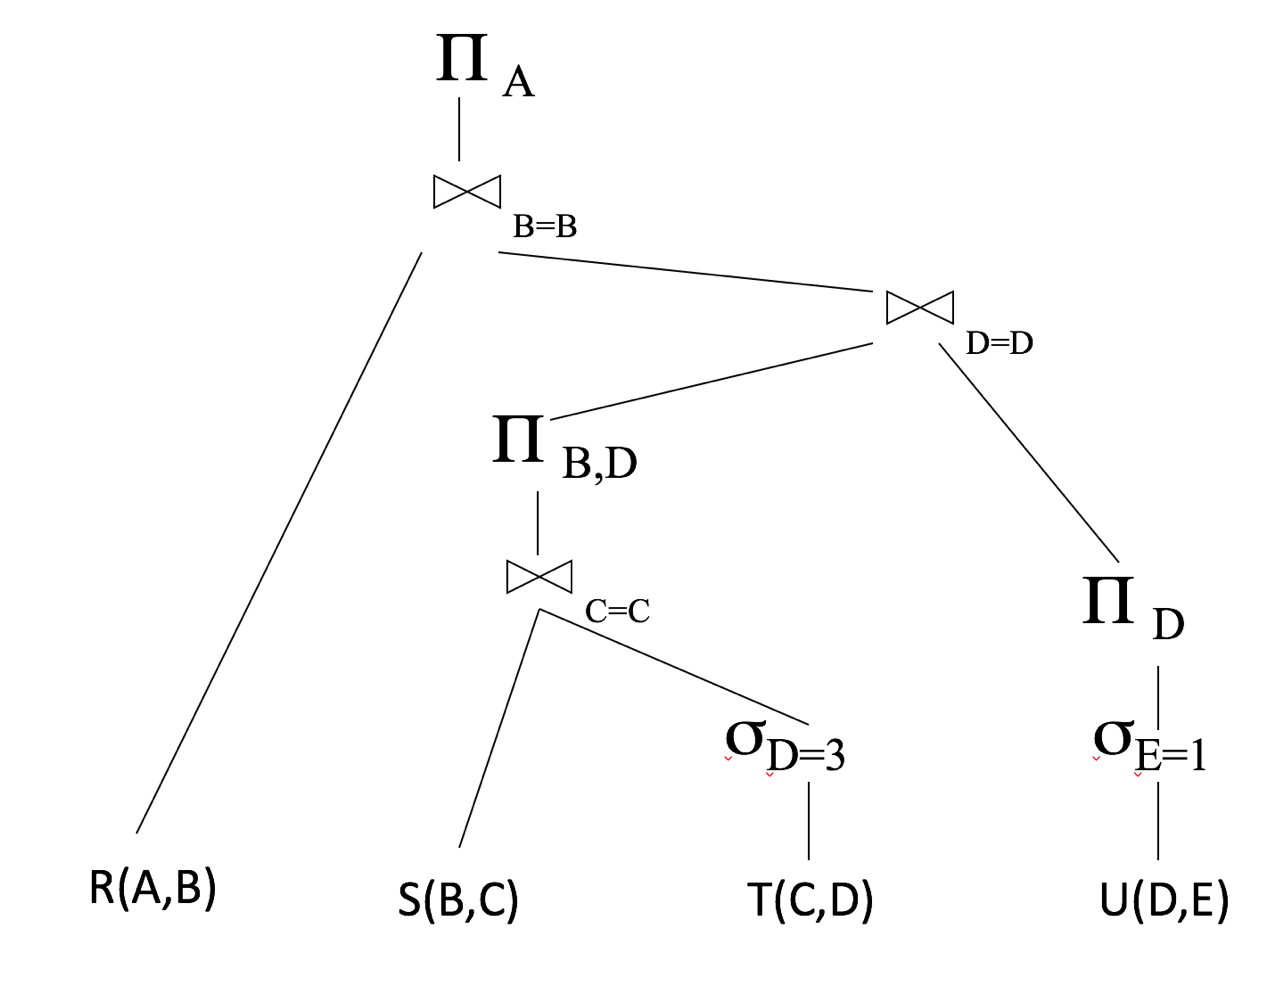

In [ ]:
# Normally it returns a empty set. Therefore i added these values:
# In returned values D's are 3, E's are 1.
%%sql
INSERT INTO R VALUES (1,1);
INSERT INTO S VALUES (1,2);
INSERT INTO T VALUES (2,3);
INSERT INTO U VALUES (3,1);
SELECT DISTINCT R.A FROM R, S, T, U
WHERE T.D = 3 AND S.C = T.C AND U.E = 1 AND U.D = T.D AND S.B = R.B;


 * sqlite://
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
Done.


A
0
2
4
6
8
1


In [ ]:
# Transfering SQL statement to RA
X = %sql SELECT DISTINCT R.A FROM R, S, T, U WHERE T.D = 3 AND S.C = T.C AND U.E = 1 AND U.D = T.D AND S.B = R.B;
x = BaseRelation(X)

# Indicating project, natural join and select operations
y = Project(['A'], NJoin(NJoin(NJoin(Select('D', 3, T), Select('E', 1, U)), S), R))
render_markdown(y)

# Printing results
print(get_result(x))

# Result sets are same

 * sqlite://
Done.


<p>$\Pi_{A}$(( ( ( $\sigma_{D=3}$(T(C,D)) ) $\Join_{D}$ ( $\sigma_{E=1}$(U(D,E)) ) ) $\Join_{C}$ ( S(B,C) ) ) $\Join_{B}$ ( R(A,B) ))</p>

[(0,), (2,), (4,), (6,), (8,), (1,)]
